## CMPBIO290: Algorithms for Single-Cell Genomics Fall 2021
Problem Set 1: Spatial Transcriptomics Data Analysis

Instructor: Yun S. Song 

GSI: Yutong Wang

Student: Maria Astolfi, Bioengineering Ph.D. student

---

## README

Here, I am: 

*   Using scanpy and Seurat to compare outputs and functions on spatial transcriptomics data
*   Describing steps as comments within the code block
*   Discussing results and outputs in text blocks within the code
*   Referencing articles on Sources organized by each question
*  Keeping selected failed attempts as future documentation 



---


##Sources

Tutorials: 

[Analysis, visualization, and integration of spatial datasets with Seurat](https://satijalab.org/seurat/articles/spatial_vignette.html)

[scanpy: Analysis and visualization of spatial transcriptomics](https://scanpy-tutorials.readthedocs.io/en/latest/spatial/basic-analysis.html)

[Seurat](https://cran.r-project.org/web/packages/Seurat/Seurat.pdf)

Literature: 

[Spatial reconstruction of single-cell gene expression
](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4430369/)

Question 1: QC metrics


[QC metrics on scanpy](https://scanpy.readthedocs.io/en/latest/generated/scanpy.pp.calculate_qc_metrics.html#scanpy.pp.calculate_qc_metrics)

[Scater: pre-processing, quality control, normalization and visualization of single-cell RNA-seq data in R](https://academic.oup.com/bioinformatics/article/33/8/1179/2907823)

[scanpy discussion on n_genes_by_count ](https://github.com/theislab/scanpy/pull/1680/commits/225cee9590e22b9cd15ba917332ff3af87d0c656)

[Seurat loading spatial data function](https://satijalab.org/seurat/reference/load10x_spatial)

Question 2-3-4: Normalization

[Current best practices in single-cell RNA-seq analysis: a tutorial](https://www.embopress.org/doi/full/10.15252/msb.20188746)

[scanpy normalize_total function](https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.normalize_total.html)

[Normalization and variance stabilization of single-cell RNA-seq data using regularized negative binomial regression](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1874-1)


Question 5: 

[Gene expression markers of identity classes](https://satijalab.org/seurat/reference/findmarkers)

[Find spatially variable features](https://satijalab.org/seurat/reference/findspatiallyvariablefeatures)

[Identification of spatial expression trends in single-cell gene expression data](https://www.nature.com/articles/nmeth.4634)

Question 6: 

[Mutual neighbors on find neighbors function](https://satijalab.org/seurat/reference/findneighbors)

[Batch effects in single-cell RNA-sequencing data are corrected by matching mutual nearest neighbors](https://www.nature.com/articles/nbt.4091)

[Run Principal Component Analysis](https://satijalab.org/seurat/reference/runpca)

Question 7-8: 

[DimPlot() function](https://satijalab.org/seurat/reference/dimplot)

[Cluster Determination](https://satijalab.org/seurat/reference/findclusters)

[Visualize spatial clustering and expression data](https://satijalab.org/seurat/reference/spatialplot)

Question 9: 

[scanpy.pl.rank_genes_groups_heatmap](https://scanpy.readthedocs.io/en/stable/generated/scanpy.pl.rank_genes_groups_heatmap.html)

Question 10:

[SpatialDE: identification of spatially variable genes](https://www.nature.com/articles/nmeth.4636)

[SpatialDE GitHub](https://github.com/Teichlab/SpatialDE)


---

# **Q1**

### Explore different quality control (QC) metrics. What factors do you think are important to take into consideration when filtering out spots and genes? Plot the data and decide the filtering thresholds accordingly.


Here, I will explore QC metrics using scanpy and Seurat. 

Starting with scanpy:

In [ ]:
pip install scanpy

In [ ]:
# import packages 

import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

In [ ]:
# download data from 10X Genomics
# create adata dataset

adata = sc.datasets.visium_sge(sample_id="V1_Mouse_Brain_Sagittal_Posterior_Section_2")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")

# calculate qc metrics using mitochondrial reads as a reference
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

  0%|          | 0.00/9.26M [00:00<?, ?B/s]

  0%|          | 0.00/19.0M [00:00<?, ?B/s]

reading /content/data/V1_Mouse_Brain_Sagittal_Posterior_Section_2/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
# print adata
adata

AnnData object with n_obs × n_vars = 3289 × 32285
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

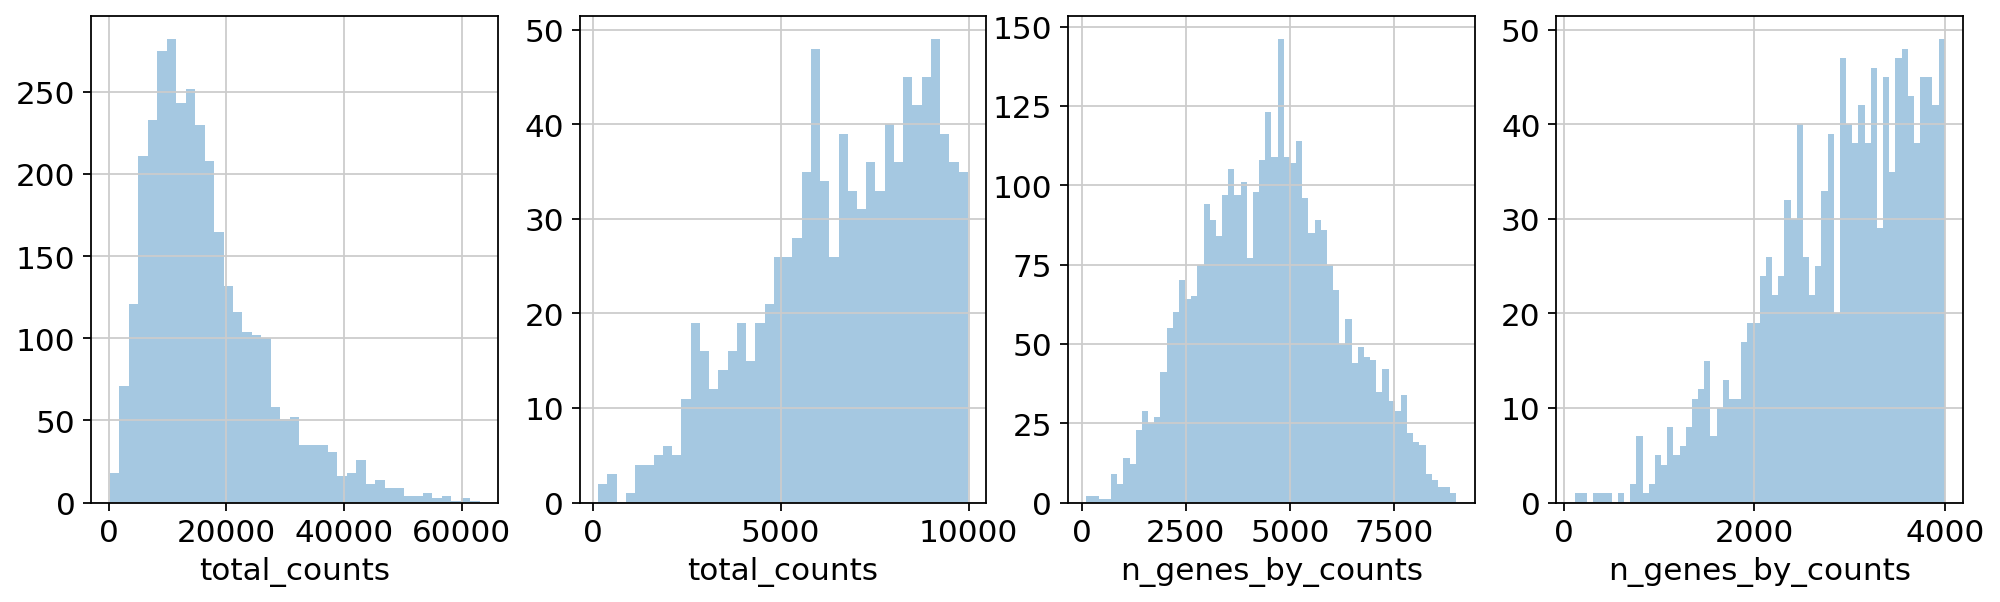

In [ ]:
# plot standard qc metrics and percentage of mitochondrial read counts per sample
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

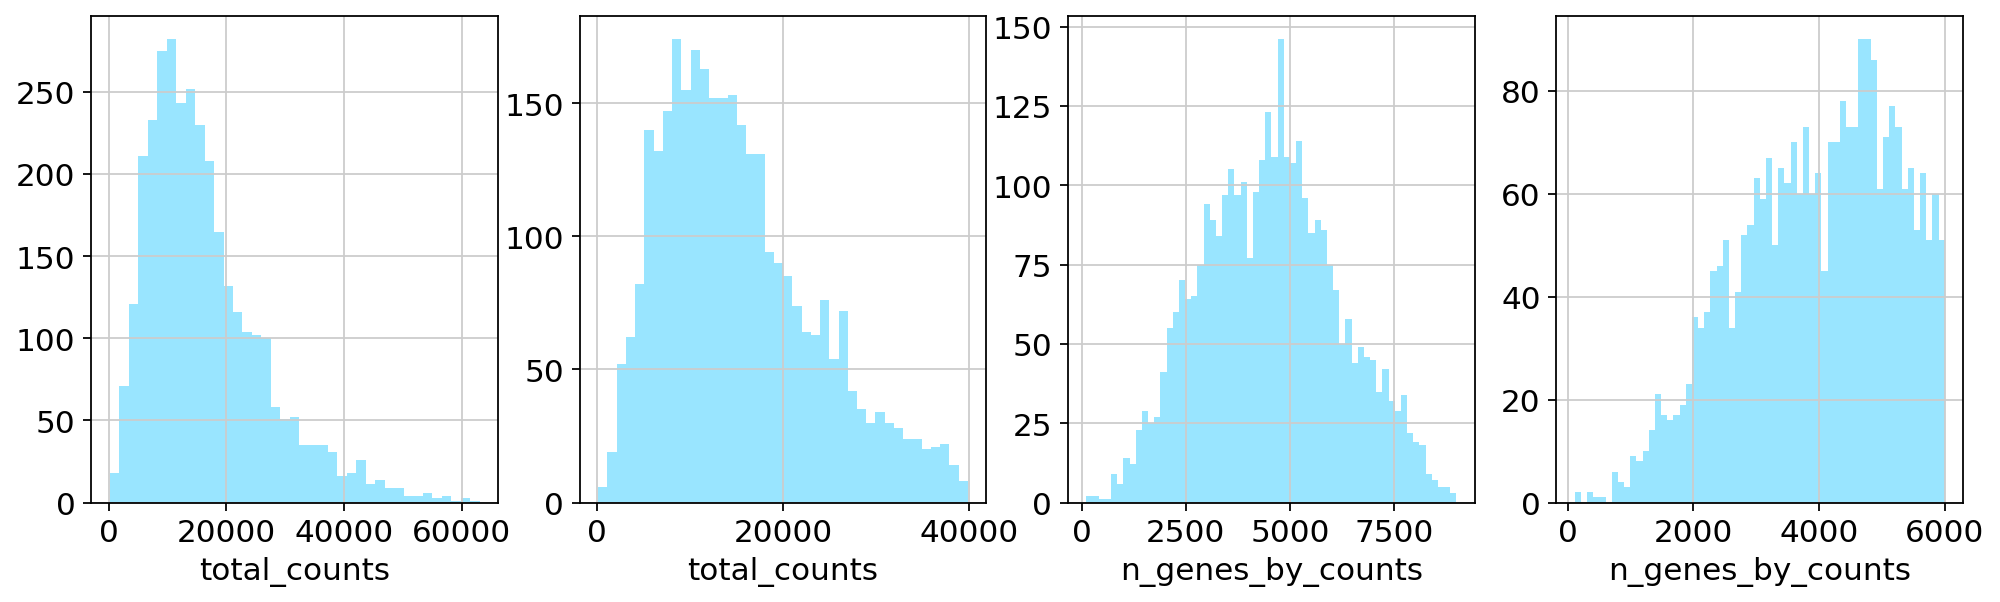

In [ ]:
# adjusting histogram scale based on total_counts data (< 60000)
# testing matplotlib colors
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], color='deepskyblue',kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 40000],color='deepskyblue', kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"],color='deepskyblue', kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 6000], color='deepskyblue',kde=False, bins=60, ax=axs[3])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


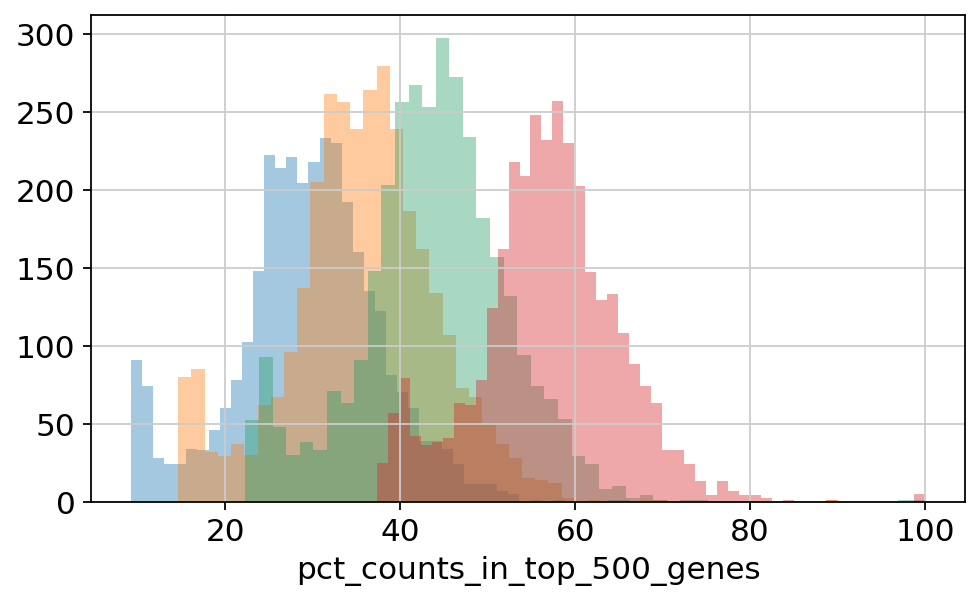

In [ ]:
# plotting pct counts in top 50 to 500 genes
fig, axs = plt.subplots(1, 1, figsize=(7, 4))
sns.distplot(adata.obs["pct_counts_in_top_50_genes"], kde=False)
sns.distplot(adata.obs["pct_counts_in_top_100_genes"], kde=False)
sns.distplot(adata.obs["pct_counts_in_top_200_genes"], kde=False)
sns.distplot(adata.obs["pct_counts_in_top_500_genes"], kde=False)

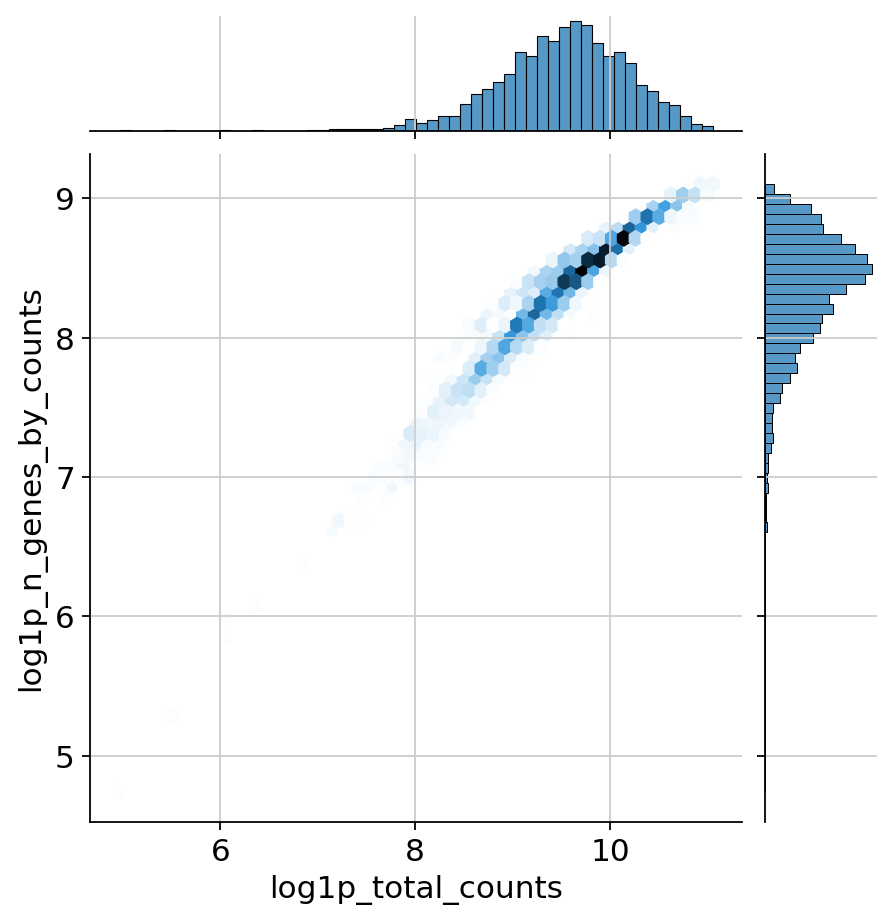

In [ ]:
# plot different visualization using log of total counts and number of genes
# use qc_vars to call variables to test 
# qc_vars = "mt" refers to mitochondrial gene reads

adata.var["mito"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)
sns.jointplot(
    data=adata.obs,
    x="log1p_total_counts",
    y="log1p_n_genes_by_counts",
    kind="hex",
)

Compare output with Seurat:

In [ ]:
# activate R magic

%load_ext rpy2.ipython

In [ ]:
%%R

.libPaths()

[1] "/usr/local/lib/R/site-library" "/usr/lib/R/site-library"      
[3] "/usr/lib/R/library"           


In [ ]:
# install Seurat
# troubleshooting installing as library was not specified in prior
%%R

install.packages('Seurat', lib="/usr/lib/R/site-library")
library(Seurat)

In [ ]:
# install SeuratData
%%R

devtools::install_github('satijalab/seurat-data')

R[write to console]: Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

R[write to console]: Downloading GitHub repo satijalab/seurat-data@HEAD



✔  checking for file ‘/tmp/RtmpeJ1iBW/remotes4b467ec7df/satijalab-seurat-data-b59556b/DESCRIPTION’
─  preparing ‘SeuratData’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘SeuratData_0.2.1.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# failed attempt trying to load the data using Load10X_Spatial function

# load data from V1 mouse brain sagittal posterior section 2 cell ranger output type using Load10X_Spatial 

%%R

data_dir <- '/content/data/V1_Mouse_Brain_Sagittal_Posterior_Section_2'
list.files(data_dir) # Should show filtered_feature_bc_matrix.h5
Load10X_Spatial(data.dir = data_dir)

In [ ]:
# following tutorial 
%%R
library(Seurat)
library(SeuratData)
library(ggplot2)
library(patchwork)
library(dplyr)

In [ ]:
# install dataset 
%%R
InstallData("stxBrain")

In [ ]:
# explore dataset and find ‘posterior2’ data to investigate Mouse Brain Serial Section 2 (Sagittal-Anterior)
%%R 
?stxBrain

In [ ]:
# load "posterior2" from brain ?stxBrain dataset
%%R 
brain <- LoadData("stxBrain", type = "posterior2")

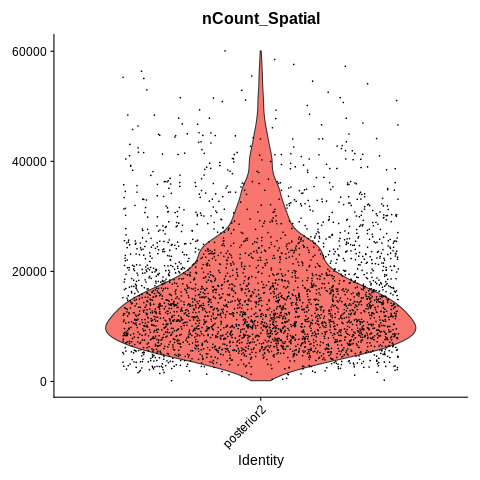

In [ ]:
# data pre processing and QC metrics
%%R 

plot1 <- VlnPlot(brain, features = "nCount_Spatial", pt.size = 0.1) + NoLegend()
plot1

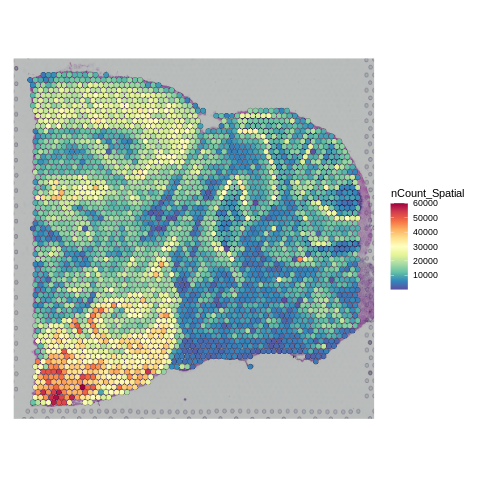

In [ ]:
%%R 
plot2 <- SpatialFeaturePlot(brain, features = "nCount_Spatial") + theme(legend.position = "right")
plot2

**Q1 discussion**

Here, it was evaluated multiple methods for qc preprocessing. We can observe in both scanpy and Seurat QC preprocessing plots a strong heterogeneity in the dataset. Relevant qc preprocessing analyses include total count,  total n of expressed genes, and plotting counts referecing a control gene (e.g., mitochondrial genes). Therefore, if a high n of counts are allocated to mitochondrial genes, it suggests technical issues regarding abundance of RNA extracted from the single-cell/tissue spot. 

As observed on Seurat plots re: nCount_Spatial function, we can see that heterogeneity is driven by spatially distributed total counts and expressed genes. 

Determining threshold should follow the distribution of total counts and high-abundance spatial regions. Low-abundance genes or genes with high dropout rates can be further filtered on downstream analyses.

# Q2
## Normalize the data. Which method did you use and why?

Here, let's use scanpy to initiate the normalization.

In [ ]:
# filtering data based on tutorial guidelines 
# filter using min counts and max counts 
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

filtered out 210 cells that have less than 5000 counts
filtered out 205 cells that have more than 35000 counts
#cells after MT filter: 2874
filtered out 15682 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, copying.


In [ ]:
# tinkering and adjusting tutorial parameters to entail the higher abundance of counts
# max_counts = 45000 counts
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=45000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

Trying to set attribute `.var` of view, copying.


#cells after MT filter: 2874


In [ ]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


**Q2 discussion**

Reading more in depth the normalize_total function (see Sources section for link), it normalizes each cell by total counts over all genes.  

As discussed on Q1, total counts and expressed genes are strongly heterogeneous and variable according to its spatial distribution in which specific regions of the tissue vary from high abundance to low abundance.

Seurat approaches it differently. To troubleshoot the abovementioned, it  developed using new tools such as SCTransform. It is based on regularized negative binomial regression. Here, the Hafemeister & Satija created a method in which sequencing depth is utilized as a covariate for normalization. It further stabilizes by using genes with similar abundances.

Let's go forward using Seurat SCTransform tool.

In [ ]:
# using sctransform as normalization tool

%%R

brain <- SCTransform(brain, assay = "Spatial", verbose = FALSE)

# Q3
## Log-transform the data, and plot the mean-variance relationship before and after the log-transformation. Is there any difference between the two plots?

Here, I am comparing log-transformation using NormalizeData and SCTransform. 

In [ ]:
%%R 
# rerun normalization to store sctransform residuals for all genes
brain <- SCTransform(brain, assay = "Spatial", return.only.var.genes = FALSE, verbose = FALSE)
# also run standard log normalization for comparison
brain <- NormalizeData(brain, verbose = FALSE, assay = "Spatial")

In [ ]:
%%R
# Computes the correlation of the log normalized data and sctransform residuals with the
# number of UMIs
brain <- GroupCorrelation(brain, group.assay = "Spatial", assay = "Spatial", slot = "data", do.plot = FALSE)
brain <- GroupCorrelation(brain, group.assay = "Spatial", assay = "SCT", slot = "scale.data", do.plot = FALSE)


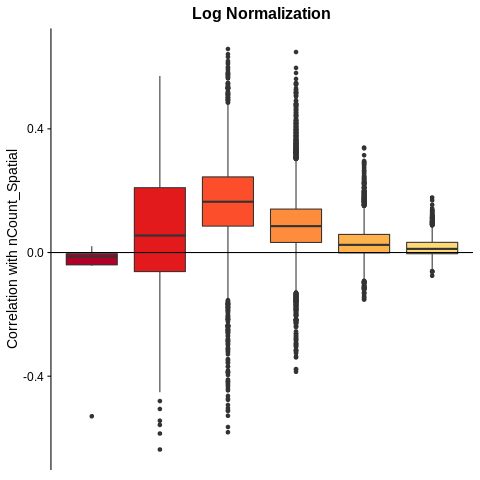

In [ ]:
%%R
p1 <- GroupCorrelationPlot(brain, assay = "Spatial", cor = "nCount_Spatial_cor") + ggtitle("Log Normalization") +
    theme(plot.title = element_text(hjust = 0.5))
p1

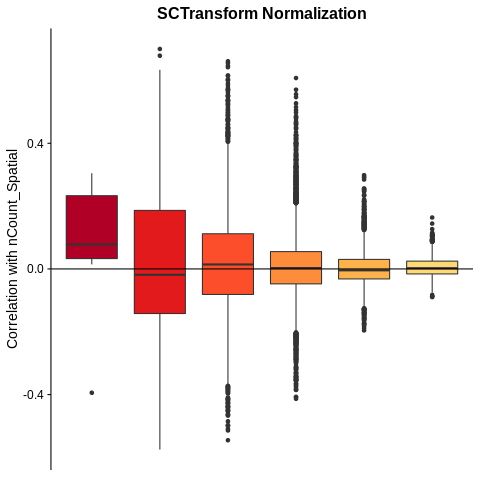

In [ ]:
%%R
p2 <- GroupCorrelationPlot(brain, assay = "SCT", cor = "nCount_Spatial_cor") + ggtitle("SCTransform Normalization") +
    theme(plot.title = element_text(hjust = 0.5))
p2

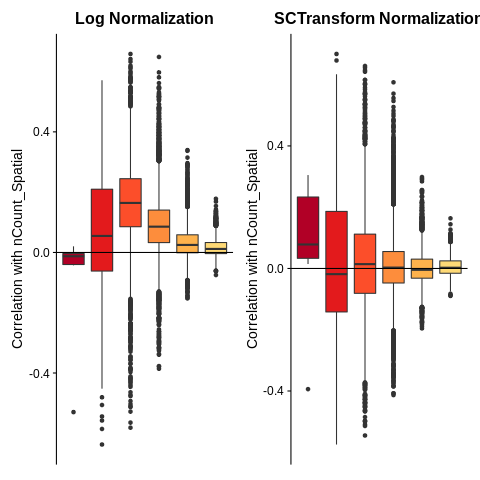

In [ ]:
%%R
p1 + p2 

Here, we are seeing genes clustered based on their mean expression and boxplots of the correlation between each gene and its number of counts spatially distributed (nCount_Spatial). 

As discussed on Q2, NormalizeData (Seurat) normalize_total (scanpy) can lead to fail to represent the data. Here, NormalizeData log-transformed failed to normalize data from the second to forth groups. 

# Q4
## Optionally you may scale the expression within each gene, or regress out any technical effect. Please comment on why it is better to do (or not to do) these preprocessing steps on our dataset.

As discussed on Q1-Q2-Q3, scaling the expression within each gene (e.g., by using the Scanpy normalize_total function) through log-transformation can lead to downstream interpretation problems regarding the heterogeinety nature of this data. Scaling the expression of each gene based on total gene expression may not consider spational constraints of the data.   

Regressing out technical effects through SCtransform is recommended and discussed in a plethora of articles on spatial transcriptomics analysis (see Resource section). 

# Q5 
## Select the top variable genes (1, 000 ∼ 5, 000) for downstream tasks. Which metric did you use to identify top variable genes?

Here, I will evaluate variable genes using Seurat. 

This task can be executed using two functions: 
FindSpatiallyVariables() and FindMarkers.

Reading in depth FindMarkers function, p-value adjustment is performed on the total number of genes in the dataset while FindSpatiallyVariables identifies genes whose expression level is dependent on their spatial location. 

I will go forward using FindSpatiallyVariableFeatures since it is dependent on spatial location.



In [ ]:
# use FindSpatiallyVariableFeatures function on Seurat
%%R

brain <- FindSpatiallyVariableFeatures(brain, assay = "SCT", features = VariableFeatures(brain)[1:1000],
    selection.method = "markvariogram")

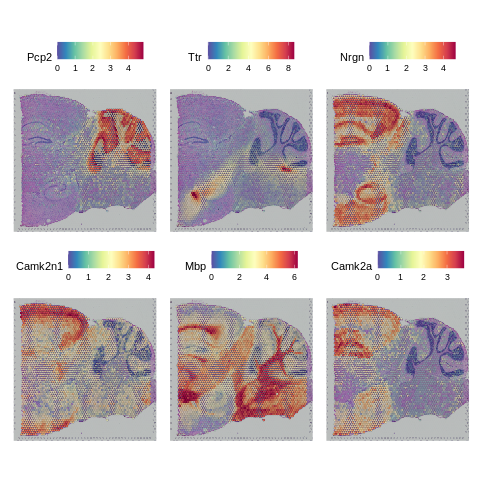

In [ ]:
# visualize expression of top 6 
%%R 

top.features <- head(SpatiallyVariableFeatures(brain, selection.method = "markvariogram"), 6)
SpatialFeaturePlot(brain, features = top.features, ncol = 3, alpha = c(0.1, 1))

Here, we can see strong spatial heterogeneity. The metric and tool I used is based on spatial distribution driving gene variability. 

# Q6 
## Perform dimension reduction on the gene expression data using any method you prefer. Please specify the dimension reduction method you used and its advantages/disadvantages.

Here, we will start using the Seurat functions RunPCA, FindNeighbors, FindClusters, and RunUMAP to perform dimensionality reduction.

 clustering, and visualization. We will then use SpatialDimPlots to plot it spatially. We can also proceed by creating spatial subsets.  

In [ ]:
# Dimensionality reduction, clustering, and visualization
%%R 
brain <- RunPCA(brain, assay = "SCT", verbose = FALSE)
brain <- FindNeighbors(brain, reduction = "pca", dims = 1:30)
brain <- FindClusters(brain, verbose = FALSE)
brain <- RunUMAP(brain, reduction = "pca", dims = 1:30)

Here, PCA is running using the SCTranform output. I chose to use Seurat for the dimension reduction method because of its FindNeighbors function, in which uses MNN (mutual nearest neighbors), an algorithm that identifies matching cell types by finding MNN pairs of cells. The advantage here is that it accounts for heterogeneity within variable data modalities as a nonlinear methodology. 

Disavantages is that it can lead to overcorrection and can struggles to entangle cell variability as noise from biological diversity/heterogeneity. 

Now on scanpy: 

Similarly, we will use the function sc.pp.pca, sc.pp.neighbors, and sc.tl.umap to perform manifold embedding and clustering.

In [ ]:
# To embed and cluster the manifold encoded by transcriptional similarity, we proceed as in the standard clustering tutorial.

sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)
running Leiden clustering
    finished: found 17 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


# Q7 

## Based on the dimension reduction result, visualize the data in a low dimensional embedding and annotate the clusters based on the expression profile similarity. Please specify the clustering method you used and its advantages/disadvantages.

On Seurat, we will use the DimPlot() function in which plot the output of a dimensional reduction technique on a 2D scatter plot. Here, each point is a cell and it's positioned based on the cell embeddings determined by the reduction technique

In [ ]:
# Visualize the results of the clustering on UMAP space (with DimPlot())
%%R

p1 <- DimPlot(brain, reduction = "umap", label = TRUE)
p1

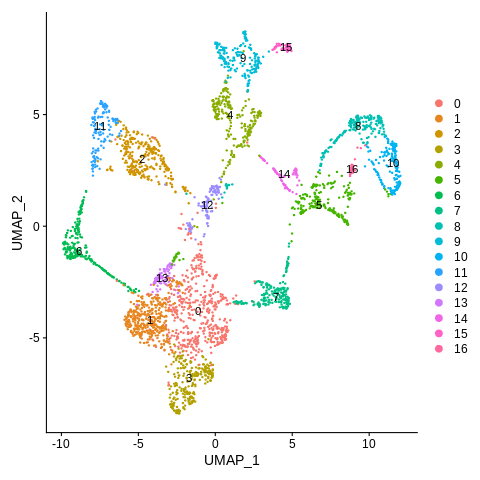

Using scanpy, we can plot the clusters generated on Q6. 

... storing 'feature_types' as categorical
... storing 'genome' as categorical


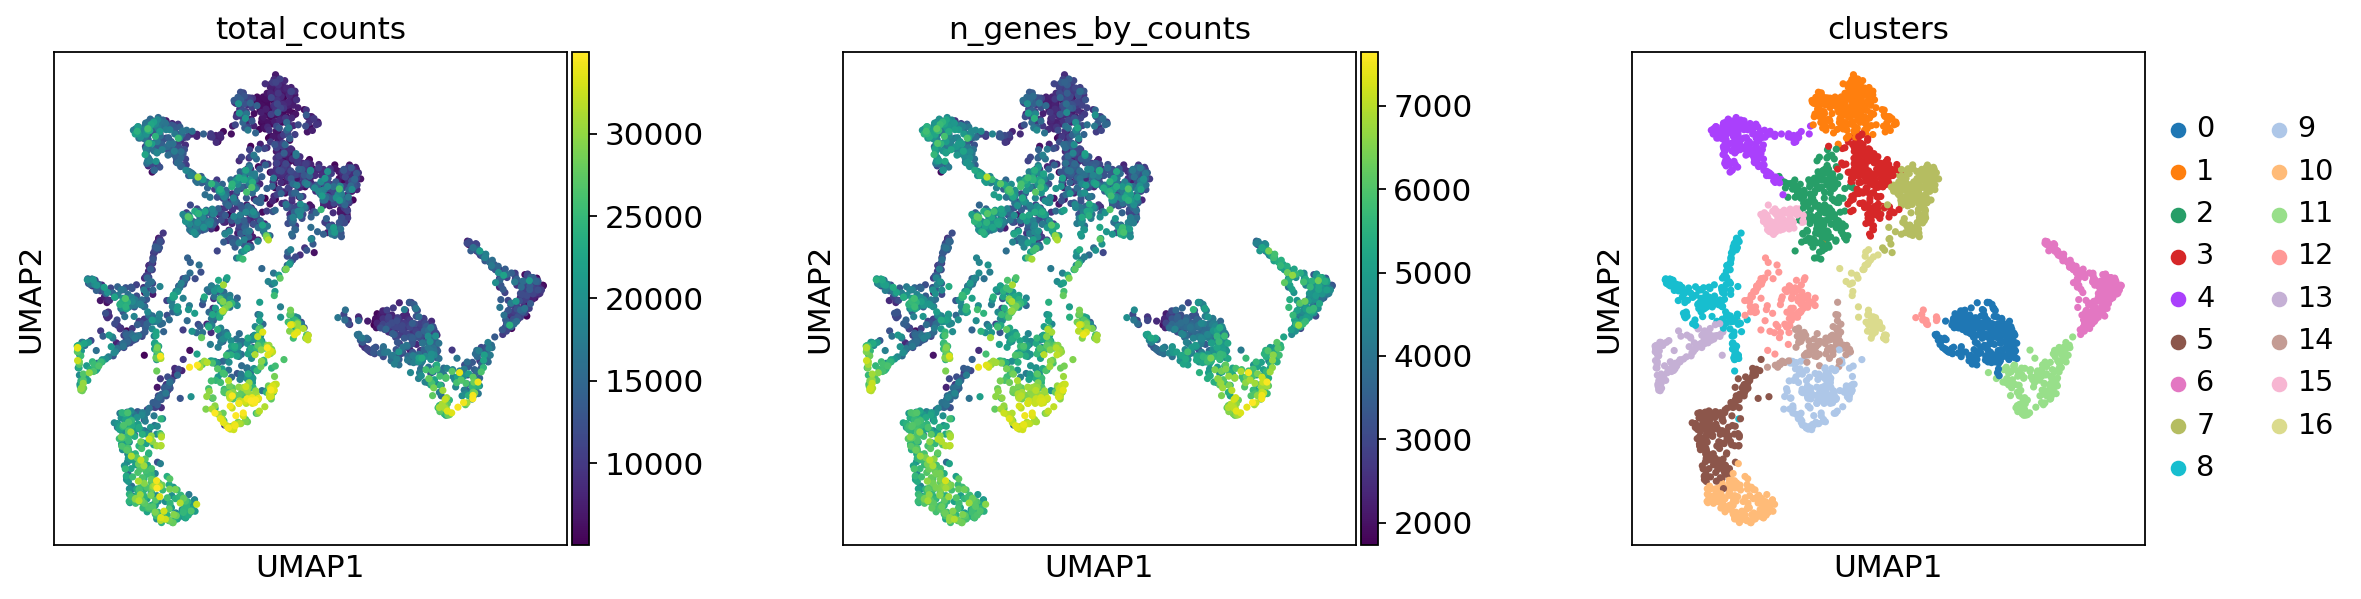

In [ ]:
# Plotting UMAP covariates and clusters

plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)


# Q8

## Visualize the clusters in spatial coordinates. Is there any cluster with an interesting spatial pattern?


Here, I am using SpatialDimPlot() function in which plots cluster assignments as spots overlaying the tissue image.

R[write to console]: Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



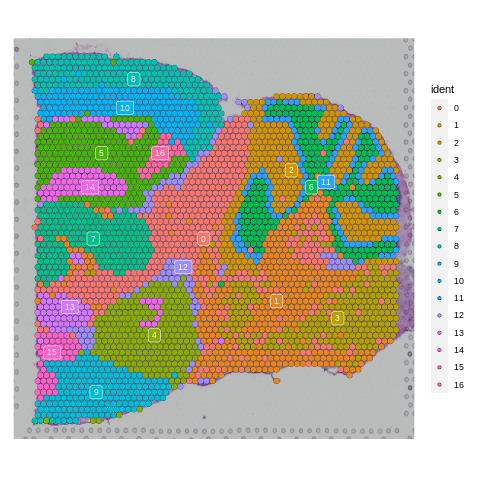

In [ ]:
# Overlaid on the image with SpatialDimPlot().
%%R 
p2 <- SpatialDimPlot(brain, label = TRUE, label.size = 3)
p2

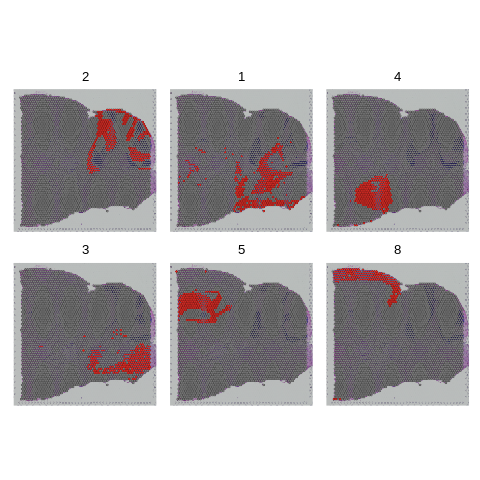

In [ ]:
# using cells.highlight parameter to demarcate particular cells of interest on a SpatialDimPlot() 
# this can be very useful for distinguishing the spatial localization of individual clusters

%%R 
SpatialDimPlot(brain, cells.highlight = CellsByIdentities(object = brain, idents = c(2, 1, 4, 3,
    5, 8)), facet.highlight = TRUE, ncol = 3)

Now using scanpy: 

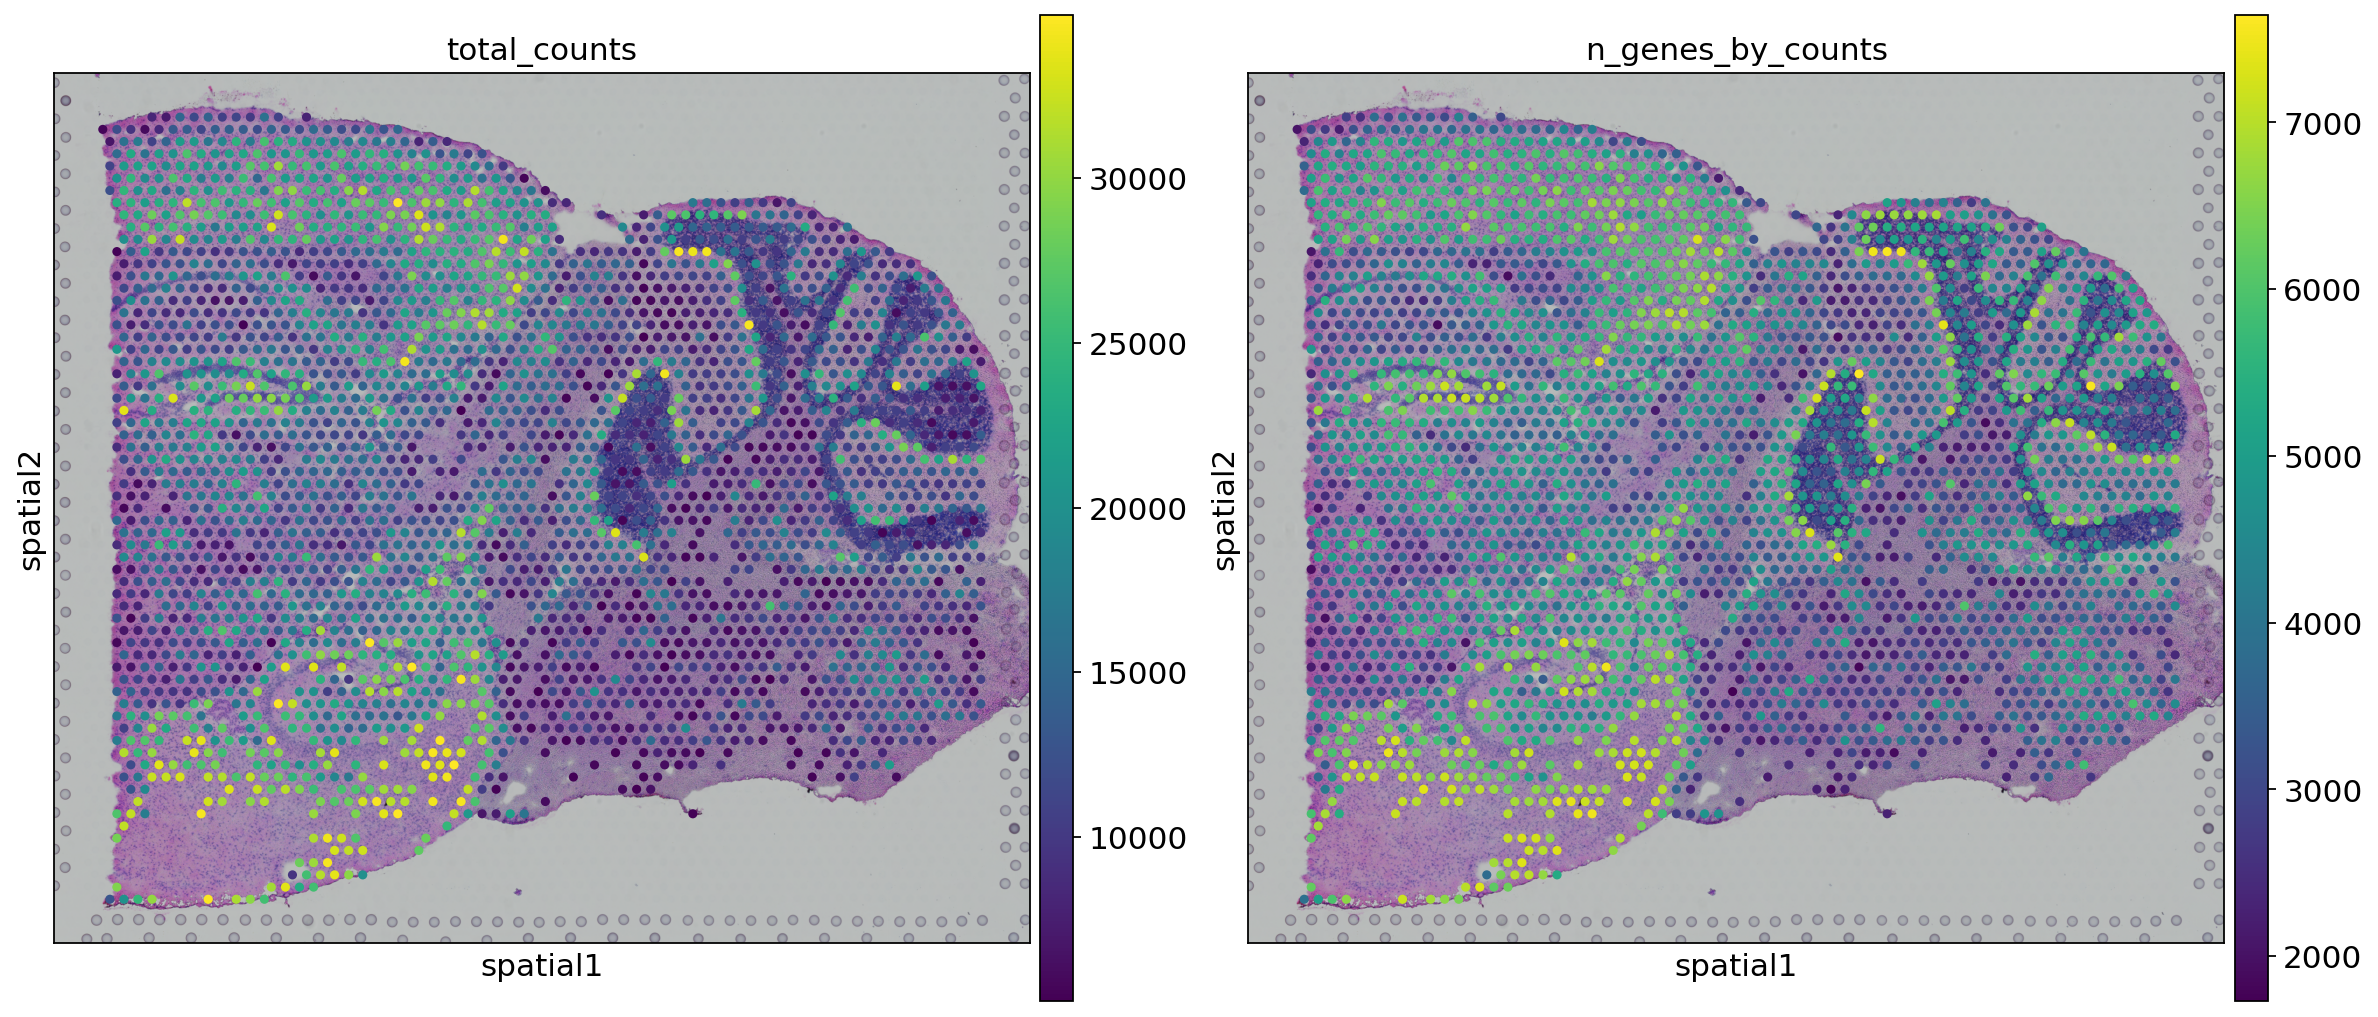

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])


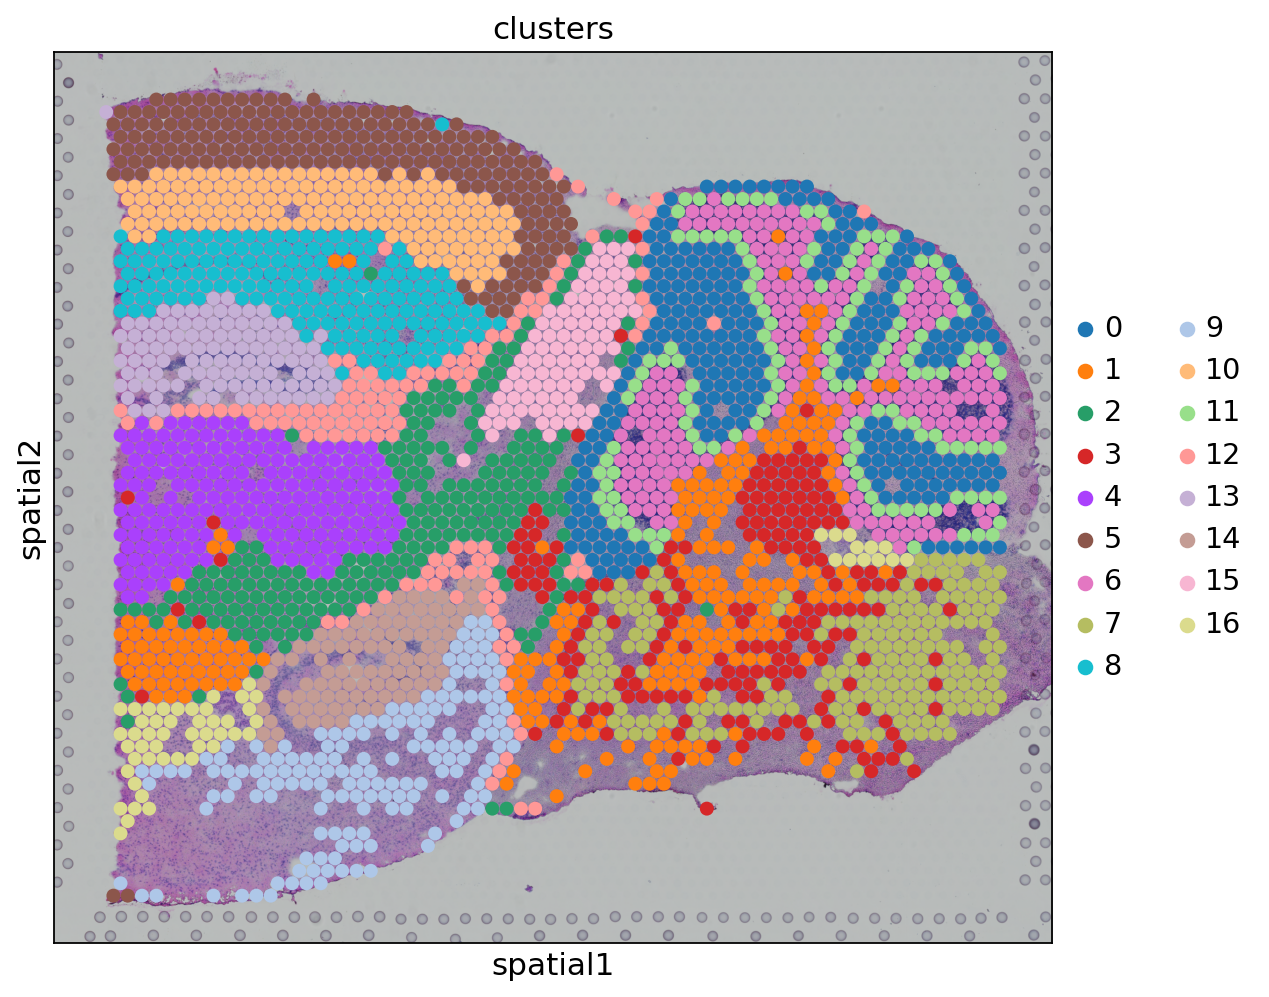

In [ ]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)


Comparing plots of clusters spatially overlaid generated from Seurat and scanpy, we can see a strong similarity of outputs. The cells.highlight also provides insights on specific clusters location. 

# Q9
## Perform statistical testing to identify genes that are up-regulated in a cluster with the maximal number of cells from Question #7. Plot a heatmap with expression levels of its top 10 up-regulated genes across all the clusters.

Here, we will use scanpy sc.t1.rank_genes_groups and sc.pl.rank_genes_groups_heatmap. 

ranking genes


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters']`
categories: 0, 1, 2, etc.
var_group_labels: 5


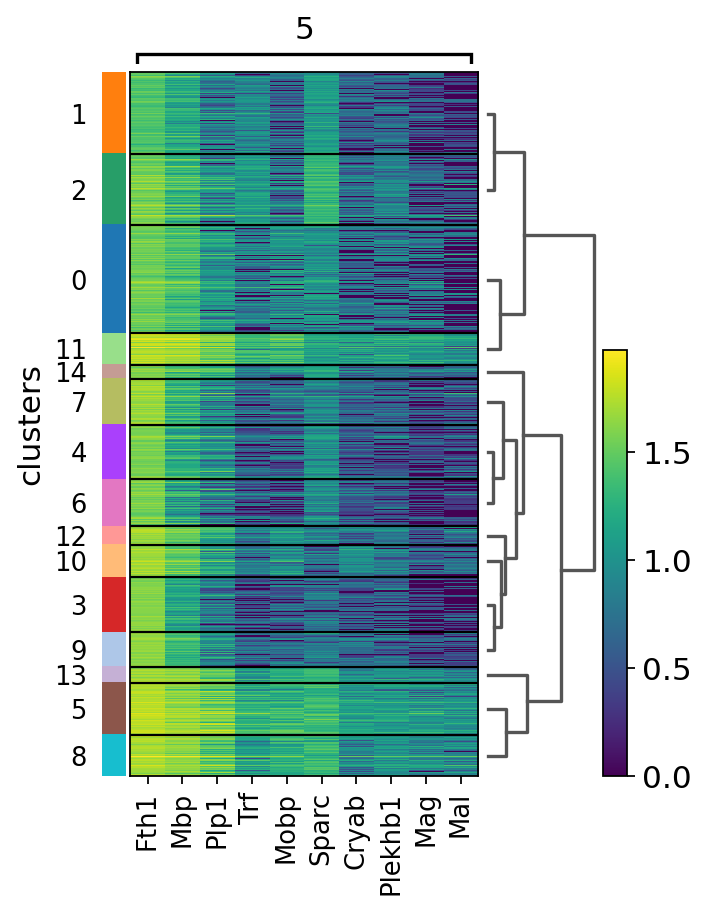

In [ ]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="5", n_genes=10, groupby="clusters")


# Q10 

## Identify spatially variable genes using any method you prefer, e.g., spatialDE, trend- sceek or SPARK. Pick the top spatially-variable gene and plot its gene expression on all the available spatial coordinates.

Here, I am evaluating spatialDE as a method to identify spatially variable genes. I am later using Seurat to generate spatial distribution plots.

In [ ]:
pip install spatialde

In [ ]:
# import spatialDE

import SpatialDE


In [ ]:
# run spatialDE

counts = pd.DataFrame(adata.X.todense(), columns=adata.var_names, index=adata.obs_names)
coord = pd.DataFrame(adata.obsm['spatial'], columns=['x_coord', 'y_coord'], index=adata.obs_names)
results = SpatialDE.run(coord, counts)

In [ ]:
# concatenating the results with the DataFrame of annotations of variables: adata.var

results.index = results["g"]
adata.var = pd.concat([adata.var, results.loc[adata.var.index.values, :]], axis=1)


In [ ]:
# inspect significant genes that varies in space and visualize them with sc.pl.spatial function
results.sort_values("qval").head(10)


FSV  M        g            l  ...  max_ll_null         LLR  pval  qval
g                                           ...                                     
Unc5b    0.129893  4    Unc5b   844.902678  ...  -134.997200   71.326934   0.0   0.0
Cst3     0.588799  4     Cst3   450.845416  ...   317.032280  483.191363   0.0   0.0
Tpbg     0.307555  4     Tpbg   450.845416  ...   176.120611   81.093651   0.0   0.0
Ccdc120  0.091188  4  Ccdc120  1583.382044  ...   -81.340631   73.126989   0.0   0.0
Chgb     0.447465  4     Chgb   450.845416  ...   122.762425  203.070362   0.0   0.0
Rtn1     0.476782  4     Rtn1   844.902678  ...   637.501155  268.644863   0.0   0.0
Stard10  0.132950  4  Stard10  1583.382044  ...  -269.363806   92.327892   0.0   0.0
Syt16    0.403090  4    Syt16   844.902678  ...  -177.019355  326.062681   0.0   0.0
Dbpht2   0.532200  4   Dbpht2   844.902678  ...  -199.059914  318.542355   0.0   0.0
Akap5    0.334987  4    Akap5   844.902678  ...    57.825390  149.168516   0.0   0.0

[10 rows x 18 columns]

Here is a ranked and sort list of spatially variable genes using the spatialDE package. 

I will go forward and plot 3 spatially variable genes using the Seurat function SpatialFeaturePlot

To select top variable genes, I will first evaluate the method on scanpy in which spatial patterns of gene expression are investigated. Here, we will find spatially variable genes using SpatialDE.  



Comparing the results, we can observe that SpatialDE and FindSpatiallyVariablesFeature output listed different set of genes. 

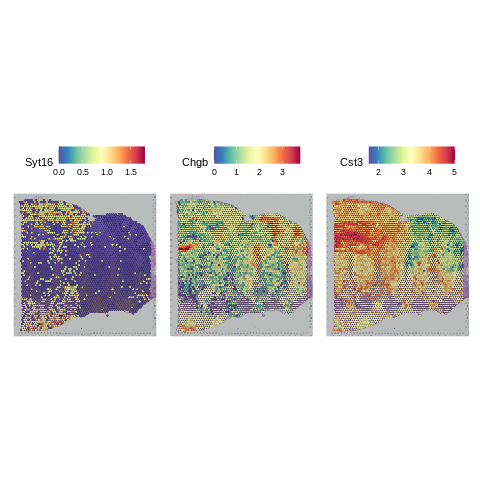

In [ ]:
# Seurat expression levels SpatialFeaturePlot
# Plotting three spatially variable genes found using SpatialDE
%%R 
SpatialFeaturePlot(brain, features = c("Syt16", "Chgb", "Cst3"))

In [ ]:
pip install leidenalg

     |████████████████████████████████| 1.4 MB 4.2 MB/s 
     |████████████████████████████████| 3.2 MB 25.6 MB/s 
